## 머신러닝 기초

In [260]:
import torch

x = torch.tensor(2.0, requires_grad=True)
y = x ** 2
y.backward()
print(x.grad)

tensor(4.)


In [261]:
import numpy as np

tsor = np.arange(7.0)
tsor.ndim # 1.    # 텐서의 차원
tsor.shape # (7,)  # 텐서의 크기



(7,)

In [262]:
tsor2 = np.arange(1.0, 13).reshape((4,3))
tsor2.ndim #2
tsor2.shape # (4,3)


(4, 3)

In [263]:
import torch

tsor3 = torch.arange(0.0, 7)
tsor3.dim() # 1
tsor3.shape  # torch.Size([7])
tsor3.size() # torch.Size([7])
tsor3.shape[0]

7

In [264]:
t = torch.arange(1,13.0).reshape((4,3))
t.dim() #2
t.size() # torch.Size([4, 3])
t.shape # torch.Size([4, 3])

t[:,1]
t[:,1].size()
t[:,:-1] # 마지막 차원 제외


tensor([[ 1.,  2.],
        [ 4.,  5.],
        [ 7.,  8.],
        [10., 11.]])

In [265]:
m1 = torch.FloatTensor([3,3])
m2 = torch.FloatTensor([2,2])
m1 + m2 # tensor([5., 5.])

tensor([5., 5.])

In [266]:
m1 = torch.FloatTensor([1,2])
m2 = torch.FloatTensor([3])
m1 + m2 # tensor([4., 5.]) 큰 size에 맞춰서 작은 사이즈가 중복되어 생김

tensor([4., 5.])

In [267]:
m1 = torch.FloatTensor([[1,2],[3,4]]) # 2*2
m2 = torch.FloatTensor([[1],[2]]) # 2*1
m1 + m2 # tensor([[2., 3.],
        #         [5., 6.]])

tensor([[2., 3.],
        [5., 6.]])

In [268]:
m1 = torch.FloatTensor([[1,2],[3,4]]) # 2*2
m2 = torch.FloatTensor([[1],[2]]) # 2*1

m1.matmul(m2).shape # torch.Size([2, 1]) 내적 (dot 연산) -> matrix multiplication 
(m1 @ m2).shape # 위와 같은 연산
torch.matmul(m1,m2)
# torch.dot(m1,m2) 벡터끼리의 내적만 지원함 행렬곱은 안됨 -> 1D 전용

tensor([[ 5.],
        [11.]])

#### 평균

In [269]:
t = torch.FloatTensor([1,2])
t.mean() # tensor(1.5000)
m1 = torch.FloatTensor([[1,2],[3,4]]) # 2*2
m1.mean()

m1.mean(dim=0 ,dtype=torch.float) # tensor([2., 3.])
m1.mean(dim=1 ,dtype=torch.float) # tensor([1.5000, 3.5000])
# m1.mean(dim=2 ,dtype=torch.float) # Dimension out of range (expected to be in range of [-2, 1], but got 2)

# dim=0이면 0번째 축(행 방향) 을 없애면서 계산,
# dim=1이면 1번째 축(열 방향) 을 없애면서 계산
m1.mean(dim=-1 ,dtype=torch.float) # tensor([1.5000, 3.5000])


tensor([1.5000, 3.5000])

#### 덧셈


In [270]:
t2 = torch.FloatTensor([[1,2],[3,4]])
t2.sum() #tensor(10.)
t2.sum(dim=0) # tensor([4., 6.])
t2.sum(dim=1) # tensor([3., 7.])
t2.sum(dim=-1) # tensor([3., 7.])

tensor([3., 7.])

#### max, arxmax


In [271]:
t3 = torch.FloatTensor([[1,2],[3,4]])
t3.max() # tensor(4.)
t3.max(dim=0) # torch.return_types.max(values=tensor([3., 4.]),indices=tensor([1, 1])) # indice= 최대값위치
t3.max(dim=1) # torch.return_types.max(values=tensor([2., 4.]),(indices=tensor([1, 1]))

t3.max(dim=0)[0] # tensor([3., 4.]) -> tensor
t3.max(dim=0)[1] # tensor([1, 1]) -> indice

tensor([1, 1])

#### view - 원소의 수를 유지하며 텐서 크기 변경 (np.reshape())

In [272]:
import numpy as np
tt = np.arange(0,12).reshape((4,3))
tt

ft = torch.FloatTensor(tt)

# tensor([[ 0.,  1.,  2.],
#         [ 3.,  4.,  5.],
#         [ 6.,  7.,  8.],
#         [ 9., 10., 11.]])


ft.shape # torch.Size([4, 3])
ft

tensor([[ 0.,  1.,  2.],
        [ 3.,  4.,  5.],
        [ 6.,  7.,  8.],
        [ 9., 10., 11.]])

In [273]:
ft.view([-1,2])

tensor([[ 0.,  1.],
        [ 2.,  3.],
        [ 4.,  5.],
        [ 6.,  7.],
        [ 8.,  9.],
        [10., 11.]])

In [274]:
ft.view([-1,1,3]).shape # torch.Size([4, 1, 3])

torch.Size([4, 1, 3])

#### squeeze -1 차원 제거, unsqueeze +1 차원추가

In [275]:
ttt = ttt = torch.arange(1,4).reshape((3,1))

ttt.shape #torch.Size([3, 1])
ttt.squeeze().shape # torch.Size([3])


tttt = torch.arange(1,4).reshape((3,1))
# tensor([[1],
#         [2],
#         [3]])
# torch.Size([3, 1])

tttt.unsqueeze(0) # 인덱스가 0부터 시작하므로 0은 첫번째 차원을 의미한다.

# tensor([[[1],
#          [2],
#          [3]]])
# torch.Size([1, 3, 1])

tttt.unsqueeze(1)

# tensor([[[1]],

#         [[2]],

        # [[3]]])
tttt.unsqueeze(1).shape

#torch.Size([3, 1, 1])



torch.Size([3, 1, 1])

In [276]:
tttt.unsqueeze(-1).shape # torch.Size([3, 1, 1])

tttt.view(1,-1) # torch.Size([1, 3])

tensor([[1, 2, 3]])

#### 타입캐스팅

In [277]:
ft = torch.LongTensor([1,2,3,4]) #tensor([1, 2, 3, 4])
ft.float() # tensor([1., 2., 3., 4.])

bt = torch.ByteTensor([True, False, False, True]) # tensor([1, 0, 0, 1], dtype=torch.uint8)
bt.long() # tensor([1, 0, 0, 1])
bt.float() # tensor([1., 0., 0., 1.])

tensor([1., 0., 0., 1.])

#### tensor 연산

In [278]:
x = torch.FloatTensor([[1,2],[3,4]])
y = torch.FloatTensor([[5,6],[7,8]])

torch.cat((x,y)) # dim= 0 

tensor([[1., 2.],
        [3., 4.],
        [5., 6.],
        [7., 8.]])

In [279]:
torch.cat((x,y),dim=1)

tensor([[1., 2., 5., 6.],
        [3., 4., 7., 8.]])

#### 스태킹

In [280]:
x = torch.FloatTensor([1,4])
y = torch.FloatTensor([2,5])
z = torch.FloatTensor([3,6])

torch.stack((x,y,z)) #1+1+1 차원 -> 2차원


tensor([[1., 4.],
        [2., 5.],
        [3., 6.]])

In [281]:
torch.cat((x.unsqueeze(0),y.unsqueeze(0), z.unsqueeze(0))) # 위와 같다.

tensor([[1., 4.],
        [2., 5.],
        [3., 6.]])

#### one_like, zeros_like -0, 1로 채워진 텐서

In [282]:
o = torch.FloatTensor([[0,1,2],[2,1,0]]) # 2 * 3 텐서
torch.ones_like(o)

tensor([[1., 1., 1.],
        [1., 1., 1.]])

In [283]:
torch.zeros_like(o)

tensor([[0., 0., 0.],
        [0., 0., 0.]])

#### in place operation 연산

In [284]:
x = torch.FloatTensor([[1,2],[3,4]])
x.mul(2)
x # 원본은 그대로임
x.mul_(2)
x # 원본이 변경됨( in_place version)

tensor([[2., 4.],
        [6., 8.]])

## 선형회귀와 다중미분

In [285]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

torch.manual_seed(1)

x_train = torch.FloatTensor([[1],[2],[3]]) # 3*1
y_train = torch.FloatTensor([[2],[4],[6]]) # 3*1

x_train.shape # torch.Size([3, 1])

# 가중치 W를 0으로 초기화하고 학습을 통해 값이 변경되는 변수임을 명시

W = torch.zeros(1, requires_grad=True) # tensor([0.], requires_grad=True)
W3 = torch.zeros(0, requires_grad=True) # tensor([], requires_grad=True)
W2 = torch.zeros((3,3), requires_grad=True) 

# tensor([[0., 0., 0.],
#         [0., 0., 0.],
#         [0., 0., 0.]], requires_grad=True)

b = torch.zeros(1, requires_grad=True)

# 경사하강법 적용할 optimizer 함수 SGD를 정의

optimizer = optim.SGD([W,b],lr=0.01) # SGD - Stochastic Gradient Descent

hypothesis = x_train * W + b

# tensor([[0.],
#         [0.],
#         [0.]], grad_fn=<AddBackward0>)

# 비용함수 = average(가설값 - 실제데이터)^2

cost = torch.mean((hypothesis - y_train) ** 2)
# tensor(18.6667, grad_fn=<MeanBackward0>)

# gradient 0으로 초기화

optimizer.zero_grad()

# 비용함수를 미분하여 gradient 계산

cost.backward()

# W, b 를 업데이트

optimizer.step()



In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

torch.manual_seed(1)

x_train = torch.FloatTensor([[1],[2],[3]]) # 3*1
y_train = torch.FloatTensor([[2],[4],[6]]) # 3*1

x_train.shape # torch.Size([3, 1])

# 가중치 W를 0으로 초기화하고 학습을 통해 값이 변경되는 변수임을 명시

W = torch.zeros(1, requires_grad=True) # tensor([0.], requires_grad=True)


# tensor([[0., 0., 0.],
#         [0., 0., 0.],
#         [0., 0., 0.]], requires_grad=True)

b = torch.zeros(1, requires_grad=True)

# 경사하강법 적용할 optimizer 함수 SGD를 정의

optimizer = optim.SGD([W,b],lr=0.00112) # SGD - Stochastic Gradient Descent

nb_epochs = 2000 # 원하는 만큼 경사하강법을 반복

for epoch in range(nb_epochs +1) :
    
    hypothesis = x_train * W + b
    cost = torch.mean((hypothesis - y_train) ** 2)
    optimizer.zero_grad()
    cost.backward()
    optimizer.step()

#   100번 마다 로그 출력
    if epoch % 100 == 0 :
      print("Epoch {:4d}/{} W: {:3f}, b: {:.3f}, Cost: {:6f}".format(epoch, nb_epochs, W.item(), b.item(), cost.item()))

Epoch    0/2000 W: 0.002091, b: 0.001, Cost: 18.666666
Epoch  100/2000 W: 0.198613, b: 0.085, Cost: 14.574195
Epoch  200/2000 W: 0.372262, b: 0.159, Cost: 11.382535
Epoch  300/2000 W: 0.525710, b: 0.224, Cost: 8.893384
Epoch  400/2000 W: 0.661319, b: 0.281, Cost: 6.952098
Epoch  500/2000 W: 0.781174, b: 0.332, Cost: 5.438072
Epoch  600/2000 W: 0.887117, b: 0.376, Cost: 4.257249
Epoch  700/2000 W: 0.980772, b: 0.415, Cost: 3.336283
Epoch  800/2000 W: 1.063577, b: 0.449, Cost: 2.617969
Epoch  900/2000 W: 1.136801, b: 0.479, Cost: 2.057692
Epoch 1000/2000 W: 1.201561, b: 0.505, Cost: 1.620668
Epoch 1100/2000 W: 1.258849, b: 0.528, Cost: 1.279763
Epoch 1200/2000 W: 1.309536, b: 0.548, Cost: 1.013818
Epoch 1300/2000 W: 1.354394, b: 0.566, Cost: 0.806334
Epoch 1400/2000 W: 1.394105, b: 0.581, Cost: 0.644440
Epoch 1500/2000 W: 1.429270, b: 0.594, Cost: 0.518100
Epoch 1600/2000 W: 1.460421, b: 0.605, Cost: 0.419488
Epoch 1700/2000 W: 1.488025, b: 0.615, Cost: 0.342501
Epoch 1800/2000 W: 1.5124

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
torch.manual_seed(1)
# 훈련 데이터
x1_train = torch.FloatTensor([[73], [93], [89], [96], [73]])
x2_train = torch.FloatTensor([[80], [88], [91], [98], [66]])
x3_train = torch.FloatTensor([[75], [93], [90], [100], [70]])
y_train = torch.FloatTensor([[152], [185], [180], [196], [142]])
# 가중치 w와 편향 b 초기화
w1 = torch.zeros(1, requires_grad=True)
w2 = torch.zeros(1, requires_grad=True)
w3 = torch.zeros(1, requires_grad=True)
b = torch.zeros(1, requires_grad=True)
# optimizer 설정
optimizer = optim.SGD( [ w1, w2, w3, b] , lr=0.00001 )


nb_epochs = 1000
for epoch in range(nb_epochs + 1):
# H(x) 계산
  hypothesis = x1_train * w1 + x2_train * w2 + x3_train * w3 + b
# cost 계산
  cost = torch.mean((hypothesis - y_train) ** 2)
# cost로 H(x) 개선
  optimizer.zero_grad()
  cost.backward()
  optimizer.step()
# 100번마다 로그 출력
  if epoch % 100 == 0:
    print('Epoch {:4d}/{} w1: {:.3f} w2: {:.3f} w3: {:.3f} b: {:.3f} Cost:{:.6f}'.format(

  epoch, nb_epochs, w1.item(), w2.item(), w3.item(), b.item(),cost.item()
))

Epoch    0/1000 w1: 0.294 w2: 0.294 w3: 0.297 b: 0.003 Cost:29661.800781
Epoch  100/1000 w1: 0.674 w2: 0.661 w3: 0.676 b: 0.008 Cost:1.563628
Epoch  200/1000 w1: 0.679 w2: 0.655 w3: 0.677 b: 0.008 Cost:1.497595
Epoch  300/1000 w1: 0.684 w2: 0.649 w3: 0.677 b: 0.008 Cost:1.435044
Epoch  400/1000 w1: 0.689 w2: 0.643 w3: 0.678 b: 0.008 Cost:1.375726
Epoch  500/1000 w1: 0.694 w2: 0.638 w3: 0.678 b: 0.009 Cost:1.319507
Epoch  600/1000 w1: 0.699 w2: 0.633 w3: 0.679 b: 0.009 Cost:1.266222
Epoch  700/1000 w1: 0.704 w2: 0.627 w3: 0.679 b: 0.009 Cost:1.215703
Epoch  800/1000 w1: 0.709 w2: 0.622 w3: 0.679 b: 0.009 Cost:1.167810
Epoch  900/1000 w1: 0.713 w2: 0.617 w3: 0.680 b: 0.009 Cost:1.122429
Epoch 1000/1000 w1: 0.718 w2: 0.613 w3: 0.680 b: 0.009 Cost:1.079390


In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
torch.manual_seed(1)
x_train = torch.FloatTensor([[73, 80, 75],
[93, 88, 93],
[89, 91, 80],
[96, 98, 100],
[73, 66, 70]])

y_train = torch.FloatTensor([[152], [185], [180], [196], [142]])
# 모델 초기화
W = torch.zeros((3, 1), requires_grad=True)
b = torch.zeros(1, requires_grad=True)
# optimizer 설정
optimizer = optim.SGD([W, b], lr=1e-5)
nb_epochs = 20
for epoch in range(nb_epochs + 1):
# H(x) 계산, 편향 b는 브로드 캐스팅되어 각 샘플에 더해집니다.
  hypothesis = x_train.matmul(W) + b
  
  # cost 계산
  cost = torch.mean((hypothesis - y_train) ** 2)
  # cost로 H(x) 개선
  optimizer.zero_grad()
  cost.backward()
  optimizer.step()


print('Epoch {:4d}/{} hypothesis: {} Cost: {:.6f}'.format(epoch, nb_epochs, hypothesis.squeeze().detach(), cost.item()
))
# 학습하여 산출된 가중치( W1~3 과 b값) 에 대하여 임의의 입력 값 적용
# no_grad() block 내 모든 연산수행시 역전파(기울기 계산) 비활성화
#
with torch.no_grad():
# 예측하고 싶은 임의의 입력값
  new_input = torch.FloatTensor([[75, 85, 72]])
  prediction = new_input.matmul(W) + b
  
print('Predicted value for input {}: {}'.format(new_input.squeeze().tolist(),prediction.item()))



Epoch   20/20 hypothesis: tensor([154.0536, 185.1134, 175.7451, 198.6146, 141.2158]) Cost: 5.957105
Predicted value for input [75.0, 85.0, 72.0]: 156.8051300048828



PyTorch는 기본적으로 모든 Tensor 연산을 추적(trace) 합니다.
왜냐하면 backward()로 역전파(gradient 계산)를 하기 위해서죠.

하지만 예측할 때는 더 이상 학습하지 않으므로,
기울기를 계산할 필요가 없습니다 → 메모리 절약 + 속도 향상.

with torch.no_grad():
    prediction = model(x)

In [ ]:
class Hello:
    def __enter__(self):
        # 사용할 자원을 가져오거나 만든다(핸들러 등)
        print('enter...')
        return self # 반환값이 있어야 VARIABLE를 블록내에서 사용할 수 있다
        
    def sayHello(self, name):
        # 자원을 사용한다. ex) 인사한다
        print('hello ' + name)

    def __exit__(self, exc_type, exc_val, exc_tb):
        # 마지막 처리를 한다(자원반납 등)
        print('exit...')

with Hello() as h:
    h.sayHello('obama')
    h.sayHello('trump')

enter...
hello obama
hello trump
exit...


In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
torch.manual_seed(1) # random seed 고정값
# 데이터
x_train = torch.FloatTensor([[1], [2], [3]])
y_train = torch.FloatTensor([[2], [4], [6]])
# 모델을 선언 및 초기화. 단순 선형 회귀이므로 input_dim=1, output_dim=1.
model = nn.Linear(1,1)
print(list(model.parameters()))
# optimizer 설정. 경사 하강법 SGD를 사용하고 learning rate를 의미하는 lr은0.01
optimizer = torch.optim.SGD(model.parameters(), lr=0.01)
# 전체 훈련 데이터에 대해 경사 하강법을 2,000회 반복
nb_epochs = 1800
for epoch in range(nb_epochs+1):
# H(x) 계산
  prediction = model(x_train)
# cost 계산
  cost = F.mse_loss(prediction, y_train) # 평균 제곱 오차 함수(pytorch 내장)
# cost로 H(x) 개선하는 부분
  optimizer.zero_grad() # gradient를 0으로 초기화
# 비용 함수를 미분하여 gradient 계산
  cost.backward() # backward 연산
# W와 b를 업데이트
  optimizer.step()
  if epoch % 100 == 0:
  # 100번마다 로그 출력
    print('Epoch {:4d}/{} Cost: {:.6f}'.format(epoch, nb_epochs, cost.item()
  ))
    
# 임의의 입력 4를 선언
new_var = torch.FloatTensor([[4.0]])
# 입력한 값 4에 대해서 예측값 y를 리턴받아서 pred_y에 저장
pred_y = model(new_var) # forward 연산
# y = 2x 이므로 입력이 4라면 y가 8에 가까운 값이 나와야 제대로 학습이 된것
print("훈련 후 입력이 4일 때의 예측값 :", pred_y)
print(list(model.parameters()))

[Parameter containing:
tensor([[0.5153]], requires_grad=True), Parameter containing:
tensor([-0.4414], requires_grad=True)]
Epoch    0/1800 Cost: 13.103541
Epoch  100/1800 Cost: 0.002791
Epoch  200/1800 Cost: 0.001724
Epoch  300/1800 Cost: 0.001066
Epoch  400/1800 Cost: 0.000658
Epoch  500/1800 Cost: 0.000407
Epoch  600/1800 Cost: 0.000251
Epoch  700/1800 Cost: 0.000155
Epoch  800/1800 Cost: 0.000096
Epoch  900/1800 Cost: 0.000059
Epoch 1000/1800 Cost: 0.000037
Epoch 1100/1800 Cost: 0.000023
Epoch 1200/1800 Cost: 0.000014
Epoch 1300/1800 Cost: 0.000009
Epoch 1400/1800 Cost: 0.000005
Epoch 1500/1800 Cost: 0.000003
Epoch 1600/1800 Cost: 0.000002
Epoch 1700/1800 Cost: 0.000001
Epoch 1800/1800 Cost: 0.000001
훈련 후 입력이 4일 때의 예측값 : tensor([[7.9982]], grad_fn=<AddmmBackward0>)
[Parameter containing:
tensor([[1.9990]], requires_grad=True), Parameter containing:
tensor([0.0023], requires_grad=True)]


In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
torch.manual_seed(1)
x_train = torch.FloatTensor([[73, 80, 75],
  [93, 88, 93],
  [89, 91, 90],
  [96, 98, 100],
  [73, 66, 70]])

y_train = torch.FloatTensor([[152], [185], [180], [196], [142]])
# 모델을 선언 및 초기화. 다중 선형 회귀이므로 input_dim=3, output_dim=1.
model = nn.Linear(3,1)
print(list(model.parameters()))

optimizer = torch.optim.SGD(model.parameters(), lr=0.00001)
nb_epochs = 2000
for epoch in range(nb_epochs+1):
# H(x) 계산
  prediction = model(x_train) #model(x_train)은 model.forward(x_train)와 동일
  
  # cost 계산
  cost = F.mse_loss(prediction, y_train) # 평균 제곱 오차 함수(pyTorch내장)
  # cost로 H(x) 개선하는 부분
  optimizer.zero_grad() # gradient를 0으로 초기화
  cost.backward() # 비용 함수를 미분하여 gradient 계산
  optimizer.step() # W와 b를 업데이트
  if epoch % 100 == 0:
    # 100번마다 로그 출력
    print('Epoch {:4d}/{} Cost: {:.6f}'.format(epoch, nb_epochs, cost.item()))
# 임의의 입력 [73, 80, 75]를 선언
new_var = torch.FloatTensor([[73, 80, 75]])
# 입력한 값 [73, 80, 75]에 대해서 예측값 y를 리턴받아서 pred_y에 저장
pred_y = model(new_var)
print("훈련 후 입력이 73, 80, 75일 때의 예측값 :", pred_y)
print(list(model.parameters()))

[Parameter containing:
tensor([[ 0.2975, -0.2548, -0.1119]], requires_grad=True), Parameter containing:
tensor([0.2710], requires_grad=True)]
Epoch    0/2000 Cost: 31667.597656
Epoch  100/2000 Cost: 0.225990
Epoch  200/2000 Cost: 0.223910
Epoch  300/2000 Cost: 0.221936
Epoch  400/2000 Cost: 0.220061
Epoch  500/2000 Cost: 0.218269
Epoch  600/2000 Cost: 0.216570
Epoch  700/2000 Cost: 0.214958
Epoch  800/2000 Cost: 0.213411
Epoch  900/2000 Cost: 0.211951
Epoch 1000/2000 Cost: 0.210564
Epoch 1100/2000 Cost: 0.209231
Epoch 1200/2000 Cost: 0.207970
Epoch 1300/2000 Cost: 0.206765
Epoch 1400/2000 Cost: 0.205617
Epoch 1500/2000 Cost: 0.204521
Epoch 1600/2000 Cost: 0.203483
Epoch 1700/2000 Cost: 0.202489
Epoch 1800/2000 Cost: 0.201539
Epoch 1900/2000 Cost: 0.200637
Epoch 2000/2000 Cost: 0.199773
훈련 후 입력이 73, 80, 75일 때의 예측값 : tensor([[151.2305]], grad_fn=<AddmmBackward0>)
[Parameter containing:
tensor([[0.9778, 0.4539, 0.5768]], requires_grad=True), Parameter containing:
tensor([0.2802], requires

In [375]:
import torch
import torch.nn as nn
import torch.nn.functional as F

torch.manual_seed(1)

x_train = torch.FloatTensor([[1],[2],[3]])
y_train = torch.FloatTensor([[4],[5],[6]])

class LinearRegressionModel(nn.Module) :
  def __init__(self):
    super().__init__()
    self.linear = nn.Linear(1,1)
    
  def forward(self, x) :
    return self.linear(x)
  
model = LinearRegressionModel()

optimizer = torch.optim.SGD(model.parameters(), lr=0.02)

nb_epochs = 1500

for epoch in range(nb_epochs +1) :
  # H(x) 계산
  prediction = model(x_train)
  # cost 계산
  cost = F.mse_loss(prediction, y_train)
  
  optimizer.zero_grad()
  cost.backward()
  optimizer.step()
  
  if epoch % 400 == 0 :
    W = model.linear.weight.item()
    b = model.linear.bias.item()
    
    print("Epoch: {:4d} W: {:.6f} b: {:.6f} Cost: {:.6f}".format(epoch, W, b, cost.item()))
  
  
  

Epoch:    0 W: 0.881058 b: -0.264944 Cost: 19.612261
Epoch:  400 W: 1.172251 b: 2.608432 Cost: 0.022209
Epoch:  800 W: 1.025057 b: 2.943039 Cost: 0.000470
Epoch: 1200 W: 1.003644 b: 2.991716 Cost: 0.000010


In [379]:
import pandas as pd

df = pd.read_csv("data/price_data.csv")
df.head(10)

,year,avgTemp,minTemp,maxTemp,rainFall,avgPrice
0,20100101,-4.9,-11.0,0.9,0.0,2123
1,20100102,-3.1,-5.5,5.5,0.8,2123
2,20100103,-2.9,-6.9,1.4,0.0,2123
3,20100104,-1.8,-5.1,2.2,5.9,2020
4,20100105,-5.2,-8.7,-1.8,0.7,2060
5,20100106,-7.3,-11.4,-2.5,0.3,2060
6,20100107,-6.7,-11.2,-1.2,0.0,2140
7,20100108,-5.6,-11.4,1.4,0.0,2140
8,20100109,-3.1,-8.8,1.8,0.1,2140
9,20100110,-1.3,-5.0,2.8,0.0,2140


#### 실활용 예시 _ 기온, 강수량에 따른 채소값 예측모델

In [403]:
# trainModel.py (핵심 부분만 교체/추가)

import os
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import pandas as pd

device = 'cuda' if torch.cuda.is_available() else 'cpu'
print(f'Using device: {device}')

# 1) 데이터 로드
df = pd.read_csv("data/price_data.csv")
# 원하는 입력 칼럼을 명시적으로 선택하세요. (예: 평균/최저/최고/강수량)
# df.columns 예시를 확인하고 정확히 맞추세요.
# print(df.columns)

# ★ 현재 3개 입력으로 학습 중이라면 예시:
X_np = df[['avgTemp', 'minTemp', 'maxTemp','rainFall']].values.astype(np.float32)  # (N,3)
y_np = df[['avgPrice']].values.astype(np.float32)                                       # (N,1)

# 2) NaN/Inf 가드
if np.isnan(X_np).any() or np.isinf(X_np).any():
    raise ValueError("X에 NaN/Inf가 포함되어 있습니다.")
if np.isnan(y_np).any() or np.isinf(y_np).any():
    raise ValueError("y에 NaN/Inf가 포함되어 있습니다.")

X = torch.from_numpy(X_np).to(device)
y = torch.from_numpy(y_np).to(device)

print("X_train:", X.shape, "Y_train:", y.shape)  # (N,3) (N,1) 확인

# 3) 정규화 (표준화)
X_mean = X.mean(dim=0, keepdim=True)
X_std  = X.std(dim=0, keepdim=True).clamp_min(1e-6)
Xn = (X - X_mean) / X_std

# (선택) 타깃 스케일 줄이기 → 안정적 학습에 도움
y_scale = 1000.0
yn = y / y_scale

# 4) 모델
class LinearRegressionModel(nn.Module):
    def __init__(self, in_dim):
        super().__init__()
        self.linear = nn.Linear(in_dim, 1)
    def forward(self, x):
        return self.linear(x)

in_dim = Xn.shape[1]
model = LinearRegressionModel(in_dim).to(device)

criterion = nn.MSELoss()

# 5) 옵티마이저: Adam 권장 (SGD면 lr 더 낮추세요: 1e-5~1e-6)
optimizer = optim.Adam(model.parameters(), lr=1e-3)

steps = 10000
for step in range(steps + 1):
    pred = model(Xn)               # 표준화된 입력 사용
    loss = criterion(pred, yn)     # 표준화된 타깃 사용

    optimizer.zero_grad()
    loss.backward()

    # (선택) 그래디언트 클리핑으로 폭주 방지
    nn.utils.clip_grad_norm_(model.parameters(), max_norm=5.0)

    optimizer.step()

    if step % 500 == 0:
        # NaN 감시
        if torch.isnan(loss):
            raise RuntimeError("Loss가 NaN입니다. 입력/타깃/학습률을 점검하세요.")
        print(f"Step: {step:6d} | Loss: {loss.item():.6f} | pred[0]: {(pred[0]*y_scale).item():.2f}")

# 6) 저장 전 폴더 보장
if loss.item() < 2.0 :
    os.makedirs("data", exist_ok=True)
    torch.save({
        "state_dict": model.state_dict(),
        "X_mean": X_mean.cpu(),
        "X_std": X_std.cpu(),
        "y_scale": y_scale
    }, "data/saved_model.pt")
    print("\n학습된 모델을 저장했습니다. 파일명: data/saved_model.pt")

Using device: cpu
X_train: torch.Size([2922, 4]) Y_train: torch.Size([2922, 1])
Step:      0 | Loss: 15.406157 | pred[0]: -264.36
Step:    500 | Loss: 11.770376 | pred[0]: -245.61
Step:   1000 | Loss: 8.859745 | pred[0]: 251.73
Step:   1500 | Loss: 6.539066 | pred[0]: 726.81
Step:   2000 | Loss: 4.891608 | pred[0]: 1143.14
Step:   2500 | Loss: 3.723203 | pred[0]: 1514.40
Step:   3000 | Loss: 2.919070 | pred[0]: 1844.44
Step:   3500 | Loss: 2.397035 | pred[0]: 2132.23
Step:   4000 | Loss: 2.087150 | pred[0]: 2374.42
Step:   4500 | Loss: 1.925621 | pred[0]: 2566.92
Step:   5000 | Loss: 1.855600 | pred[0]: 2706.96
Step:   5500 | Loss: 1.832079 | pred[0]: 2796.24
Step:   6000 | Loss: 1.826438 | pred[0]: 2843.11
Step:   6500 | Loss: 1.825520 | pred[0]: 2861.43
Step:   7000 | Loss: 1.825392 | pred[0]: 2865.43
Step:   7500 | Loss: 1.825359 | pred[0]: 2864.68
Step:   8000 | Loss: 1.825348 | pred[0]: 2863.36
Step:   8500 | Loss: 1.825345 | pred[0]: 2862.49
Step:   9000 | Loss: 1.825344 | pred[0

In [412]:
from flask import Flask, request, render_template
import torch
import torch.nn as nn
import sys

device = 'cuda' if torch.cuda.is_available() else 'cpu'
print(f'Using device: {device}')

# ---- 모델 아키텍처 ----
class LinearRegressionModel(nn.Module):
    def __init__(self, in_dim: int):
        super().__init__()
        self.linear = nn.Linear(in_dim, 1)
    def forward(self, x):
        return self.linear(x)

# ---- 체크포인트 로드 ----
try:
    ckpt = torch.load('data/saved_model.pt', map_location=device)
    state = ckpt["state_dict"] if isinstance(ckpt, dict) and "state_dict" in ckpt else ckpt
    in_dim = state["linear.weight"].shape[1]

    if in_dim != 5:
        print(f"[경고] 체크포인트 입력 차원 불일치 (in_dim={in_dim})")
    model = LinearRegressionModel(in_dim).to(device)
    model.load_state_dict(state)
    model.eval()

    X_mean = torch.as_tensor(ckpt.get("X_mean", 0), device=device) if isinstance(ckpt, dict) else None
    X_std  = torch.as_tensor(ckpt.get("X_std", 1), device=device) if isinstance(ckpt, dict) else None
    y_scale = ckpt.get("y_scale", 1.0) if isinstance(ckpt, dict) else 1.0

    print("✅ 모델 로드 완료 | 입력 차원:", in_dim)
except FileNotFoundError:
    print("❌ 오류: saved_model.pt를 찾을 수 없습니다.")
    sys.exit(1)

# Flask 초기화
app = Flask(__name__)

@app.route("/", methods=['GET', 'POST'])
def home():
    predicted_price = None

    if request.method == 'POST':
        try:
            avgTemp = float(request.form['avgTemp'])
            minTemp = float(request.form['minTemp'])
            maxTemp = float(request.form['maxTemp'])
            rainfall = float(request.form['rainfall'])

            x = torch.tensor([[avgTemp, minTemp, maxTemp, rainfall]], dtype=torch.float32, device=device)
            if X_mean is not None and X_std is not None:
                x = (x - X_mean) / X_std

            with torch.no_grad():
                y_pred = model(x) * y_scale
                predicted_price = f"{y_pred.item():,.2f}"
        except Exception as e:
            return f"에러 발생: {e} <a href='/'>돌아가기</a>"

    return render_template("index.html", prediction=predicted_price)

if __name__ == '__main__':
    app.run(host='0.0.0.0', port=8081)

Using device: cpu
[경고] 체크포인트 입력 차원 불일치 (in_dim=4)
✅ 모델 로드 완료 | 입력 차원: 4
 * Serving Flask app '__main__'
 * Debug mode: off


 * Running on all addresses (0.0.0.0)
 * Running on http://127.0.0.1:8081
 * Running on http://192.168.0.99:8081
Press CTRL+C to quit
127.0.0.1 - - [14/Oct/2025 13:52:14] "GET / HTTP/1.1" 200 -
127.0.0.1 - - [14/Oct/2025 13:52:14] "GET /static/style.css HTTP/1.1" 200 -
127.0.0.1 - - [14/Oct/2025 13:52:28] "POST / HTTP/1.1" 200 -
127.0.0.1 - - [14/Oct/2025 13:52:29] "GET /static/style.css HTTP/1.1" 304 -
127.0.0.1 - - [14/Oct/2025 13:52:46] "POST / HTTP/1.1" 200 -
127.0.0.1 - - [14/Oct/2025 13:52:46] "GET /static/style.css HTTP/1.1" 304 -


In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

torch.manual_seed(1)

x_data = [[1,2],[2,3],[3,1],[4,3],[5,3],[6,2]]
y_data = [[0],[0],[0],[1],[1],[1]]
x_train = torch.FloatTensor(x_data) # torch.Size([6, 2])
y_train = torch.FloatTensor(y_data) # torch.Size([6, 1])

class BinaryClassfier(nn.Module):
  def __init__(self) :
    super().__init__()
    self.linear = nn.Linear(2,1)
    self.sigmoid = nn.Sigmoid()
    
  def forward(self, x) :
    return self.sigmoid(self.linear(x))
  
model = BinaryClassfier()

optimizer = optim.SGD(model.parameters(), lr=1)
nb_epochs = 1000
for epoch in range(nb_epochs + 1) :
  hypothesis = model(x_train)
  
  cost = F.binary_cross_entropy(hypothesis, y_train)
  
  # cost 로 H(x) 개선
  optimizer.zero_grad()
  cost.backward()
  optimizer.step()
  
  if epoch % 100 == 0 :
    prediction = hypothesis >= torch.FloatTensor([0.5]) # 예측값이 0.5를 넘으면 True
    correct_predication = prediction.float() == y_train
    accuracy = correct_predication.sum().item() / len(correct_predication) #정확도
    print("Epoch {:4d}/{}, Cost: {:.6f} Accuracy {:2.2f}%".format(epoch,nb_epochs,cost.item(),accuracy * 100))

In [ ]:
# 학습된 모델에 임의의입력 [1,4] 를 적용하여 값을 검증
new_var = torch.FloatTensor([1.0,4.0])
pred_y = model(new_var) # forward 연산
print("훈련 후 입력이 [1,4] 일때의 예측값 :", pred_y)

predition = pred_y >= torch.FloatTensor([0.5])
print(predition)

이 이미지 데이터 레이블은 5이다.


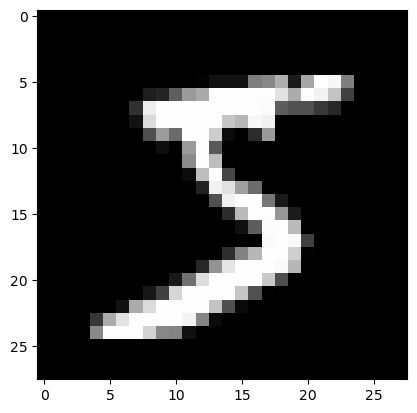

In [414]:
import numpy as np
import torch
from torch import nn
from torch import optim
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml
from torch.utils.data import TensorDataset, DataLoader
from sklearn.model_selection import train_test_split

mnist = fetch_openml('mnist_784', version=1, cache=True, as_frame=False)
mnist.data[0]
mnist.target[0]
mnist.target = mnist.target.astype(np.int8)
X = mnist.data / 255
y = mnist.target

plt.imshow(X[0].reshape(28,28), cmap='gray')
print("이 이미지 데이터 레이블은 {:.0f}이다.".format(y[0]))

Epoch:    1/3 Cost: 0.236985
Epoch:    2/3 Cost: 0.305861
Epoch:    3/3 Cost: 0.267922
/n 테스트 데이터에서 예측 정확도 9614/10000 96
예측결과 : 2
이 이미지 데이터의 정답 레이블은 2


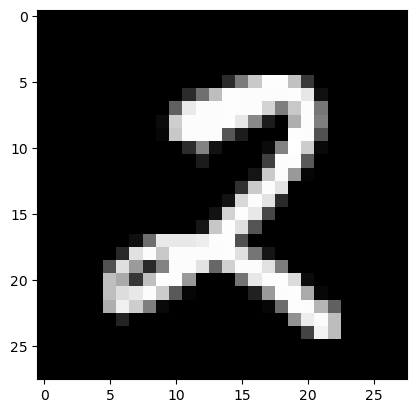

In [415]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=1/7, random_state=0)

# 텐서로 변환

X_train = torch.Tensor(X_train)
X_test = torch.Tensor(X_test)
y_train = torch.Tensor(y_train)
y_test = torch.Tensor(y_test)

#TensorDataset 객체 생성

ds_train = TensorDataset(X_train, y_train)
ds_test = TensorDataset(X_test, y_test)

# DataLoader 객체 생성

loader_train = DataLoader(ds_train, batch_size=64, shuffle=True)
loader_test = DataLoader(ds_test, batch_size=64, shuffle=True)


model = nn.Sequential()
model.add_module("fc1", nn.Linear(28*28*1, 100))
model.add_module("relu1", nn.ReLU())
model.add_module("fc2", nn.Linear(100,100))
model.add_module("relu2", nn.ReLU())
model.add_module("fc3", nn.Linear(100,10))
# print(model)

loss_fn = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.01)

epochs = 3

for epoch in range(epochs) :
  for data, targets in loader_train :
    optimizer.zero_grad()
    y_pred = model(data)
    loss = loss_fn(y_pred, targets.long())
    loss.backward()
    optimizer.step()
    
  print(f"Epoch: {epoch+1:4d}/{3} Cost: {loss.item():.6f}")

model.eval()
correct = 0

#데이터로더에서 미니배치를 하나씩 꺼내 추록을 수행

with torch.no_grad() :
  for data, targets in loader_test :
    outputs = model(data)
    # 추론계산
    _, predicted = torch.max(outputs.data,1)
    # 정답과 일치한 경우 정답 카운트를 증가
    correct += (predicted == targets).sum().item()
    
# 정확도 출력

data_num = len(loader_test.dataset)
print(f"/n 테스트 데이터에서 예측 정확도 {correct:.0f}/{data_num} {100*correct/data_num:.0f}")

index = 2018

model.eval()
data = X_test[index]
ouput = model(data)

_, predicted = torch.max(ouput.data, 0) # 확률이 가장 높은 레이블 계산
print(f"예측결과 : {predicted}")

X_test_show = (X_test[index]).numpy()
plt.imshow(X_test_show.reshape(28,28), cmap='gray')
print(f"이 이미지 데이터의 정답 레이블은 {y_test[index]:.0f}")


In [416]:
# relu test
import torch
import torch.nn as nn

relu = nn.ReLU()
x = torch.tensor([-2.0, -1.0, 0.0, 2.0, 3.0])
print(relu(x))
# tensor([0., 0., 0., 2., 3.]) -> 음수 :0, 양수 : 통과

tensor([0., 0., 0., 2., 3.])


#### RNN 구현해보기

In [418]:
import torch
import torch.nn as nn

input_size = 5
hidden_size = 8

# (batch_size, time_steps, input_size)

inputs = torch.Tensor(1,10,input_size)
cell = nn.RNN(input_size, hidden_size, batch_first=True)
outputs, _status = cell(inputs)
print(outputs.shape) # torch.Size([1, 10, 8])
print(_status.shape) # torch.Size([1, 1, 8])

torch.Size([1, 10, 8])
torch.Size([1, 1, 8])


BRNN : 양방향순환신경망

In [419]:
inputs = torch.Tensor(1,10,5)
cell = nn.RNN(input_size=5, hidden_size =8, num_layers = 2, batch_first=True)
outputs, _status = cell(inputs)
print(outputs.shape)
print(_status.shape)

torch.Size([1, 10, 8])
torch.Size([2, 1, 8])


In [420]:
inputs = torch.Tensor(1,10,5)
cell = nn.RNN(input_size= 5, hidden_size = 8, num_layers = 2, batch_first= True, bidirectional=True)
outputs, _status = cell(inputs)
print(outputs.shape)
print(_status.shape)

torch.Size([1, 10, 16])
torch.Size([4, 1, 8])


LSTM( Long-short Ter, Memory)

- 바닐라 RNN 한계  -> 비교적 짧은 시퀀스에 대해서만 효과적
- RNN의 time step이 길어질수록 앞의 정보가 뒤로 충분히 전달 못됨
- 정보량이 소실되는 장기의존성 문제가 발생
- 은닉층의 메모리셀에 입력게이트, 망각게이트 , 출력게이트를 추가해 불필요한 정보제거,유지할 정보 정함
- 은닉층 계산식이 바닐라 RNN보다 복잡, cell-state 추가
- 이를 통해 긴 시퀀스 처리에 탁월한 성능을 보임

In [423]:
import torch
import torch.nn as nn

torch.__version__

'2.6.0'

In [ ]:
input_dim = 5
hidden_size = 8

nn.RNN(input_dim, hidden_size, batch_first=True)  # RNN(5, 8, batch_first=True)

nn.LSTM(input_dim, hidden_size, batch_first=True) # LSTM(5, 8, batch_first=True)

# GRU(Gated Recurrent Unit)

nn.RNN(input_dim, hidden_size, batch_first=True)
nn.GRU(input_dim, hidden_size, batch_first=True) # GRU(5, 8, batch_first=True)

GRU(5, 8, batch_first=True)

In [431]:
# -*- coding: utf-8 -*-
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np

input_str = 'apple'
label_str = 'pple!'
char_vocab = sorted(list(set(input_str+label_str)))
vocab_size = len(char_vocab)
print ('문자 집합의 크기 : {}'.format(vocab_size))

# 하이퍼파라메터 정의( 입력=원-핫 벡터이므로 입력의 크기=문자집합의 크기)
input_size = vocab_size # 입력의 크기는 문자 집합의 크기
hidden_size = 5
output_size = 5
learning_rate = 0.1
char_to_index = dict((c, i) for i, c in enumerate(char_vocab)) # 문자에 고유한 정수 인덱스 부여
print(char_to_index)

index_to_char={}
for key, value in char_to_index.items():
  index_to_char[value] = key
print(index_to_char)

x_data = [char_to_index[c] for c in input_str]
y_data = [char_to_index[c] for c in label_str]
print(x_data)
print(y_data)
# pytorch의 nn.RNN()은 기본적으로 3차원 텐서를 입력값으로 받는다.
#  배치 차원 추가필요
# 텐서 연산인 unsqueeze(0)를 통해 해결할 수도 있었음.
x_data = [x_data]
y_data = [y_data]
print(x_data)
print(y_data)
# 입력 sequence의 각 문자들을 원-핫 벡터로 변경
x_one_hot = [np.eye(vocab_size)[x] for x in x_data]
print(x_one_hot)
# 이후, 입력데이터와 레이블데이터를 tensor로 변환
X = torch.FloatTensor(x_one_hot)
Y = torch.LongTensor(y_data)
print('훈련 데이터의 크기 : {}'.format(X.shape))
print('레이블의 크기 : {}'.format(Y.shape))


class Net(torch.nn.Module):
  def __init__(self, input_size, hidden_size, output_size):
    super(Net, self).__init__()
    self.rnn = torch.nn.RNN(input_size, hidden_size, batch_first=True) # RNN셀 구현
    self.fc = torch.nn.Linear(hidden_size, output_size, bias=True) # 출력층 구현
  def forward(self, x): # 구현한 RNN 셀과 출력층을 연결
    x, _status = self.rnn(x)
    x = self.fc(x)
    return x

net = Net(input_size, hidden_size, output_size)
outputs = net(X)
print(outputs.shape) # 3차원 텐서
print(outputs.view(-1, input_size).shape) # 2차원 텐서로 변환
print(Y.shape)
print(Y.view(-1).shape)


criterion = torch.nn.CrossEntropyLoss()
optimizer = optim.Adam(net.parameters(), learning_rate)


for i in range(100):
  optimizer.zero_grad()
  outputs = net(X)
  loss = criterion(outputs.view(-1, input_size), Y.view(-1)) # view를 하는 이유는 Batch 차원 제거를 위해
  loss.backward() # 기울기 계산
  optimizer.step() # 아까 optimizer 선언 시 넣어둔 파라미터 업데이트
  # 아래 세 줄은 모델이 실제 어떻게 예측했는지를 확인하기 위한 코드.

result = outputs.data.numpy().argmax(axis=2) # 최종 예측값인 각 time-step 별 5차원 벡터에 대해서 가장 높은 값의 인덱스를 선택

result_str = ''.join([index_to_char[c] for c in np.squeeze(result)])
print(i, "loss: ", loss.item(), "prediction: ", result, "true Y: ", y_data,"prediction str: ", result_str)

문자 집합의 크기 : 5
{'!': 0, 'a': 1, 'e': 2, 'l': 3, 'p': 4}
{0: '!', 1: 'a', 2: 'e', 3: 'l', 4: 'p'}
[1, 4, 4, 3, 2]
[4, 4, 3, 2, 0]
[[1, 4, 4, 3, 2]]
[[4, 4, 3, 2, 0]]
[array([[0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1.],
       [0., 0., 0., 1., 0.],
       [0., 0., 1., 0., 0.]])]
훈련 데이터의 크기 : torch.Size([1, 5, 5])
레이블의 크기 : torch.Size([1, 5])
torch.Size([1, 5, 5])
torch.Size([5, 5])
torch.Size([1, 5])
torch.Size([5])
99 loss:  0.0008274141582660377 prediction:  [[4 4 3 2 0]] true Y:  [[4, 4, 3, 2, 0]] prediction str:  pple!


/var/folders/qb/k2smljtx419g49xbkmv9zs700000gn/T/ipykernel_30201/2010995795.py:41: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at /Users/runner/miniforge3/conda-bld/libtorch_1741562938389/work/torch/csrc/utils/tensor_new.cpp:257.)
  X = torch.FloatTensor(x_one_hot)


In [433]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
# 훈련데터의 처리
sentence = ("if you want to build a ship, don't drum up people together to "
"collect wood and don't assign them tasks and work, but rather "
"teach them to long for the endless immensity of the sea.")

char_set = list(set(sentence)) # 중복을 제거한 문자 집합 생성
char_dic = {c: i for i, c in enumerate(char_set)} # 각 문자에 정수 인코딩
print(char_dic) # 공백도 여기서는 하나의 원소

dic_size = len(char_dic)
print('문자 집합의 크기 : {}'.format(dic_size))

# 하이퍼파라미터 설정, hidden_size(은닉상태의 크기)를 입력의 크기와 동일(다른값도 무방함)
hidden_size = dic_size
sequence_length = 10 # 임의 숫자 지정
learning_rate = 0.1
# 데이터 구성
x_data = []
y_data = []

# sequence_length값인 10의 단위로 샘플을 잘라 데이터를 보여줌
for i in range(0, len(sentence) - sequence_length):
  x_str = sentence[i:i + sequence_length]
  y_str = sentence[i + 1: i + sequence_length + 1]
  print(i, x_str, '->', y_str)
  x_data.append([char_dic[c] for c in x_str]) # x str to index
  y_data.append([char_dic[c] for c in y_str]) # y str to index
# 이상, 170개의 샘플이 생성되었으며, 각 샘플의 각 문자들은 고유한 정수로인코딩이 된 상태. 이중 0번째 레이블데이터와 데이터를 출력
print(x_data[0])
print(y_data[0])
# 입력 시퀀스에 대하여 원-핫 인코딩을 수행후, 입력데이터와 레이블데이터를 텐서로 변환
x_one_hot = [np.eye(dic_size)[x] for x in x_data] # x 데이터는 원-핫 인코딩
X = torch.FloatTensor(x_one_hot)
Y = torch.LongTensor(y_data)
print('훈련 데이터의 크기 : {}'.format(X.shape))
print('레이블의 크기 : {}'.format(Y.shape))
# 원-핫 인코딩 된 결과중 첫번째 샘플만 출력
print(X[0])
print(Y[0])

# 모델 설계부분, 은닉층은 2개,
class Net(torch.nn.Module):
  def __init__(self, input_dim, hidden_dim, layers): # 현재 hidden_size는dic_size와 같음.
    super(Net, self).__init__()
    self.rnn = torch.nn.RNN(input_dim, hidden_dim, num_layers=layers,batch_first=True)
    self.fc = torch.nn.Linear(hidden_dim, hidden_dim, bias=True)
  def forward(self, x):
    x, _status = self.rnn(x)
    x = self.fc(x)
    return x

net = Net(dic_size, hidden_size, 2) # 은닉층을 두 개 쌓습니다.
criterion = torch.nn.CrossEntropyLoss()
optimizer = optim.Adam(net.parameters(), learning_rate)

# 모델에 입력을 넣은 후 출력의 크기를 확인
outputs = net(X)
print(outputs.shape) # 3차원 텐서
print(outputs.view(-1, dic_size).shape) # 2차원 텐서로 변환.
print(Y.shape)
print(Y.view(-1).shape)

for i in range(100):
  optimizer.zero_grad()
  outputs = net(X) # (170, 10, 25) 크기를 가진 텐서를 매 에포크마다 모델의 입력으로 사용
  loss = criterion(outputs.view(-1, dic_size), Y.view(-1))
  loss.backward()
  optimizer.step()
# results의 텐서 크기는 (170, 10)
  results = outputs.argmax(dim=2)

predict_str = ""
for j, result in enumerate(results):
  if j == 0: # 처음에는 예측 결과를 전부 가져오지만
    predict_str += ''.join([char_set[t] for t in result])
  else: # 그 다음에는 마지막 글자만 반복 추가
    predict_str += char_set[result[-1]]
    print(predict_str)

{'.': 0, 'p': 1, 'u': 2, 'f': 3, 'w': 4, 'b': 5, ',': 6, 'a': 7, 'm': 8, 'k': 9, 'c': 10, 'l': 11, 'g': 12, 's': 13, 'n': 14, 't': 15, ' ': 16, "'": 17, 'o': 18, 'y': 19, 'r': 20, 'e': 21, 'h': 22, 'd': 23, 'i': 24}
문자 집합의 크기 : 25
0 if you wan -> f you want
1 f you want ->  you want 
2  you want  -> you want t
3 you want t -> ou want to
4 ou want to -> u want to 
5 u want to  ->  want to b
6  want to b -> want to bu
7 want to bu -> ant to bui
8 ant to bui -> nt to buil
9 nt to buil -> t to build
10 t to build ->  to build 
11  to build  -> to build a
12 to build a -> o build a 
13 o build a  ->  build a s
14  build a s -> build a sh
15 build a sh -> uild a shi
16 uild a shi -> ild a ship
17 ild a ship -> ld a ship,
18 ld a ship, -> d a ship, 
19 d a ship,  ->  a ship, d
20  a ship, d -> a ship, do
21 a ship, do ->  ship, don
22  ship, don -> ship, don'
23 ship, don' -> hip, don't
24 hip, don't -> ip, don't 
25 ip, don't  -> p, don't d
26 p, don't d -> , don't dr
27 , don't dr ->  don't